In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df =pd.read_csv("kyphosis.csv")

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


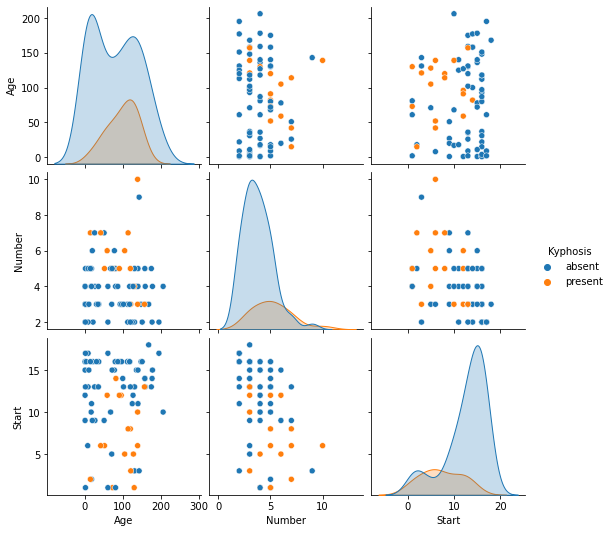

In [8]:
sns.pairplot(df,hue='Kyphosis')

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop('Kyphosis',axis=1)

In [13]:
y=df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree= DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
predictions=dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  4]
 [ 1  1]]
              precision    recall  f1-score   support

      absent       0.95      0.83      0.88        23
     present       0.20      0.50      0.29         2

    accuracy                           0.80        25
   macro avg       0.57      0.66      0.58        25
weighted avg       0.89      0.80      0.84        25



In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators=200)

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [49]:
rfc_pred=rfc.predict(X_test)

In [50]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[20  3]
 [ 1  1]]
              precision    recall  f1-score   support

      absent       0.95      0.87      0.91        23
     present       0.25      0.50      0.33         2

    accuracy                           0.84        25
   macro avg       0.60      0.68      0.62        25
weighted avg       0.90      0.84      0.86        25



In [51]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Tree visualization

In [59]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

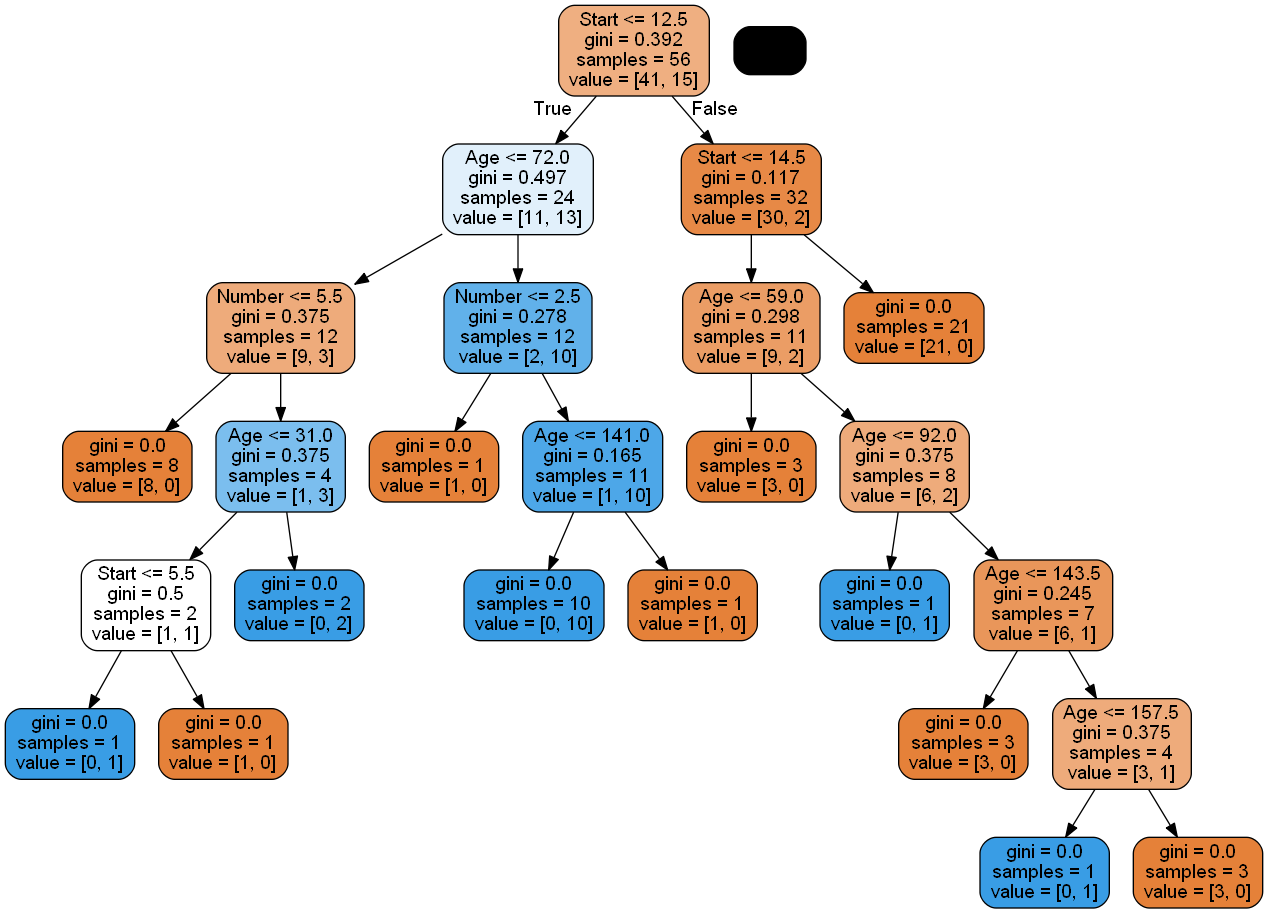

In [65]:
dot_data =StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True, rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# OR

[Text(0.5, 0.9285714285714286, 'Start <= 12.5\ngini = 0.392\nsamples = 56\nvalue = [41, 15]\nclass = Absent'),
 Text(0.26666666666666666, 0.7857142857142857, 'Age <= 72.0\ngini = 0.497\nsamples = 24\nvalue = [11, 13]\nclass = Present'),
 Text(0.13333333333333333, 0.6428571428571429, 'Number <= 5.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]\nclass = Absent'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Absent'),
 Text(0.2, 0.5, 'Age <= 31.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Present'),
 Text(0.13333333333333333, 0.35714285714285715, 'Start <= 5.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Absent'),
 Text(0.06666666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Present'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Absent'),
 Text(0.26666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Present'),
 Text(0.4, 0.642857142

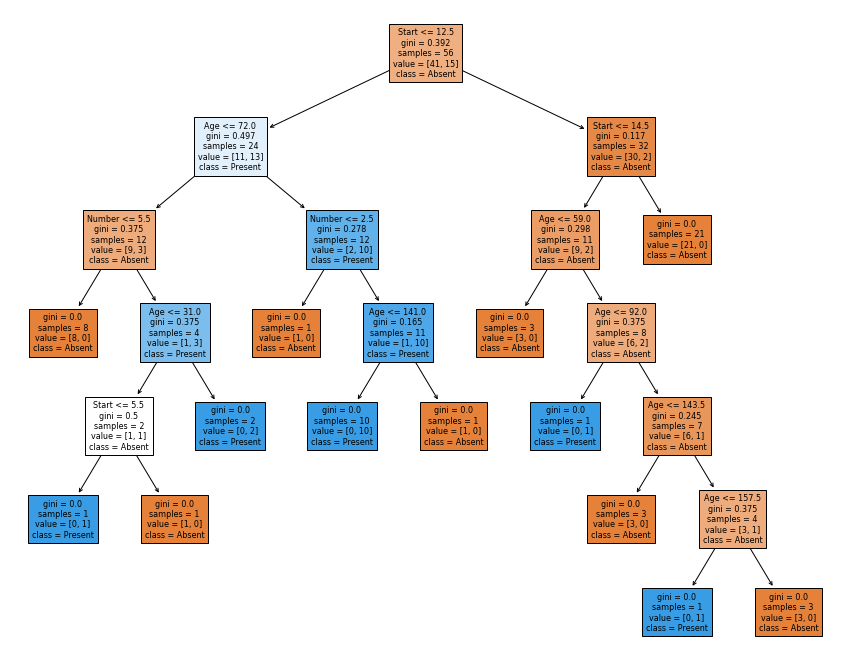

In [69]:
from sklearn import tree
plt.figure(figsize=(15, 12))
tree.plot_tree(dtree, filled=True, fontsize=8, feature_names=X_train.columns, class_names=['Absent', 'Present'])